In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
path = 'C:\\Users\ABOLARIN BUKOLA\Documents\Data set\diamonds.csv\diamonds.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

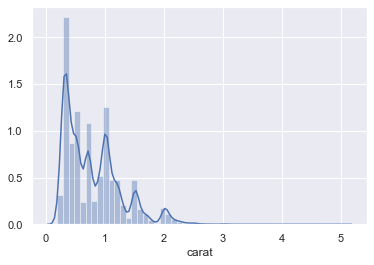

In [8]:
sns.distplot(df['carat'])

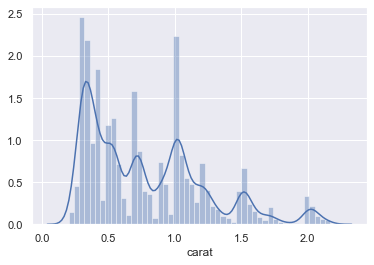

In [9]:
q = df['carat'].quantile(0.99)
df = df[df['carat'] < q]

sns.distplot(df['carat'])

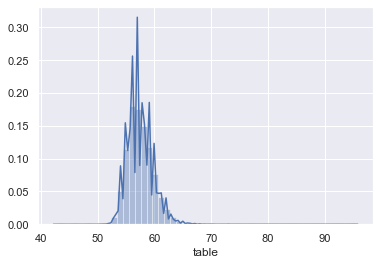

In [10]:
sns.distplot(df['table'])

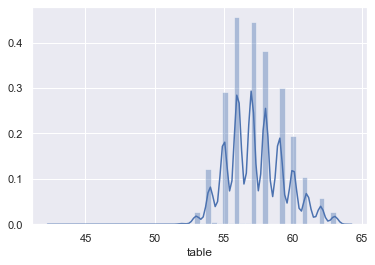

In [11]:
q = df['table'].quantile(0.99)
df = df[df['table'] < q]

sns.distplot(df['table'])

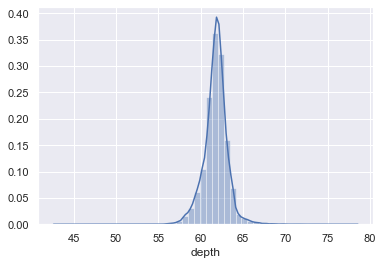

In [12]:
sns.distplot(df['depth'])

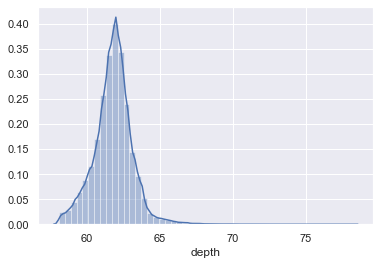

In [13]:
q = df['depth'].quantile(0.01)
df = df[df['depth'] > q]

sns.distplot(df['depth'])

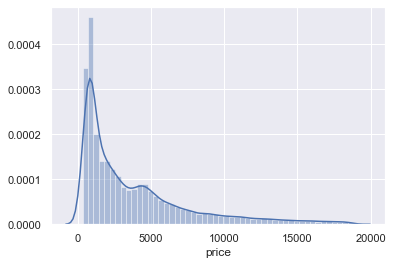

In [14]:
sns.distplot(df['price'])

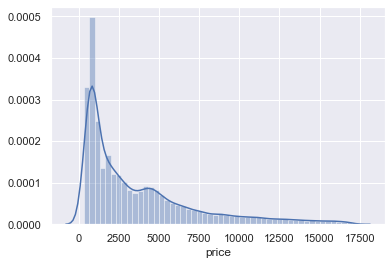

In [15]:
q = df['price'].quantile(0.99)
df = df[df['price'] < q]

sns.distplot(df['price'])

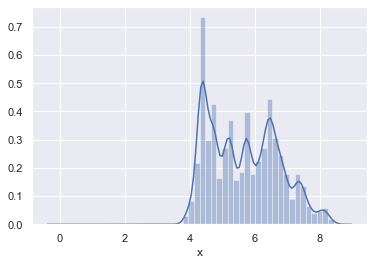

In [16]:
sns.distplot(df['x'])

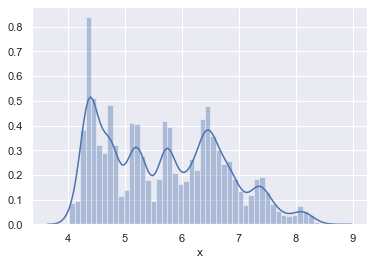

In [17]:
q = df['x'].quantile(0.01)
df = df[df['x'] > q]

sns.distplot(df['x'])

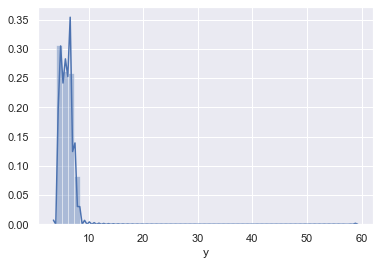

In [18]:
sns.distplot(df['y'])

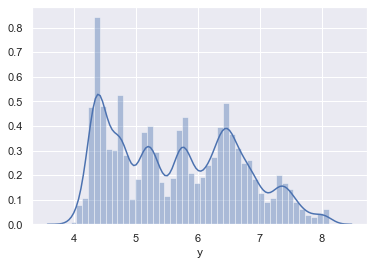

In [19]:
q = df['y'].quantile(0.99)
df = df[df['y'] < q]

sns.distplot(df['y'])

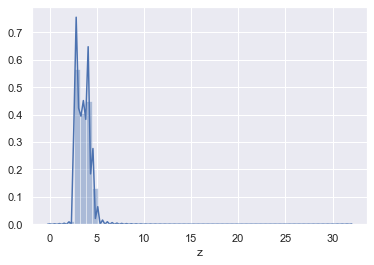

In [20]:
sns.distplot(df['z'])

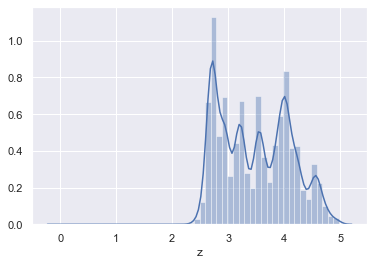

In [21]:
q = df['z'].quantile(0.99)
df = df[df['z'] < q]

sns.distplot(df['z'])

In [22]:
df.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z'], dtype=object)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['carat', 'depth', 'table', 'x','y', 'z',]]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


VIF features
0  9673.614383    const
1    37.743487    carat
2     3.012326    depth
3     1.127530    table
4   385.574081        x
5   371.127863        y
6   124.718224        z

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['carat', 'depth', 'table', 'z']]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

VIF features
0  3996.424326    const
1    29.749827    carat
2     1.219517    depth
3     1.110678    table
4    29.932937        z

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['carat', 'depth', 'table',]]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

VIF features
0  3986.514035    const
1     1.045505    carat
2     1.070410    depth
3     1.108775    table

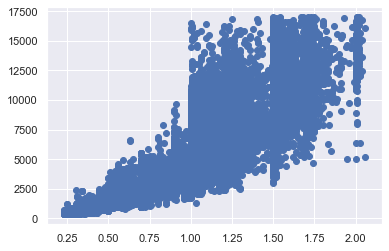

In [26]:
fig,ax = plt.subplots()
ax.scatter(df['carat'], df['price'])

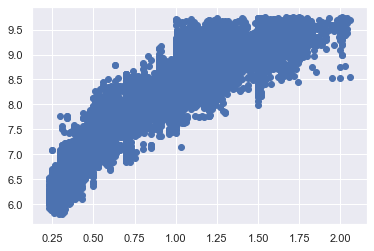

In [27]:
df['log_price'] = np.log(df['price'])

fig,ax = plt.subplots()
ax.scatter(df['carat'], df['log_price'])

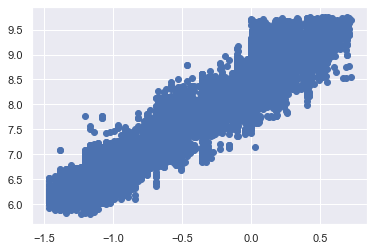

In [28]:
df['log_carat'] = np.log(df['carat'])

fig,ax = plt.subplots()
ax.scatter(df['log_carat'], df['log_price'])

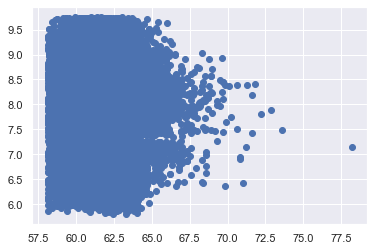

In [29]:
fig,ax = plt.subplots()
ax.scatter(df['depth'], df['log_price'])

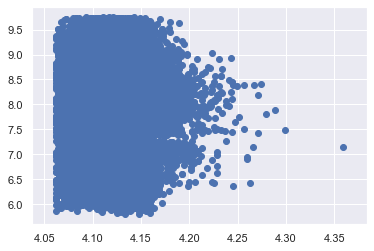

In [30]:
df['log_depth'] = np.log(df['depth'])

fig,ax = plt.subplots()
ax.scatter(df['log_depth'], df['log_price'])

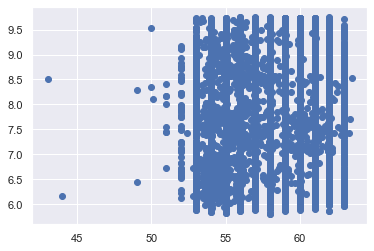

In [31]:
fig,ax = plt.subplots()
ax.scatter(df['table'], df['log_price'])

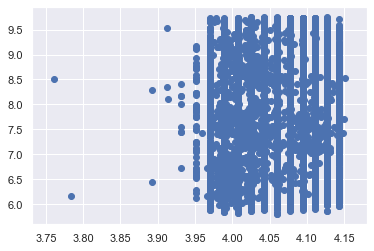

In [32]:
df['log_table'] = np.log(df['table'])

fig,ax = plt.subplots()
ax.scatter(df['log_table'], df['log_price'])

In [33]:
df_new = df.copy()

In [34]:
df_new.drop(['price', 'carat', 'depth', 'table', 'x', 'y', 'z', ], axis = 1, inplace = True)

In [35]:
df_new

cut color clarity  log_price  log_carat  log_depth  log_table
3        Premium     I     VS2   5.811141  -1.237874   4.133565   4.060443
4           Good     J     SI2   5.814131  -1.171183   4.147885   4.060443
7      Very Good     H     SI1   5.820083  -1.347074   4.125520   4.007333
10          Good     J     SI1   5.826000  -1.203973   4.158883   4.007333
13         Ideal     J     SI2   5.840642  -1.171183   4.130355   3.988984
...          ...   ...     ...        ...        ...        ...        ...
53935      Ideal     D     SI1   7.921898  -0.328504   4.107590   4.043051
53936       Good     D     SI1   7.921898  -0.328504   4.144721   4.007333
53937  Very Good     D     SI1   7.921898  -0.356675   4.139955   4.094345
53938    Premium     H     SI2   7.921898  -0.150823   4.110874   4.060443
53939      Ideal     D     SI2   7.921898  -0.287682   4.130355   4.007333

[50198 rows x 7 columns]

In [36]:
df1 = pd.get_dummies(df_new, drop_first = True)

In [37]:
df1

log_price  log_carat  log_depth  log_table  cut_Good  cut_Ideal  \
3       5.811141  -1.237874   4.133565   4.060443         0          0   
4       5.814131  -1.171183   4.147885   4.060443         1          0   
7       5.820083  -1.347074   4.125520   4.007333         0          0   
10      5.826000  -1.203973   4.158883   4.007333         1          0   
13      5.840642  -1.171183   4.130355   3.988984         0          1   
...          ...        ...        ...        ...       ...        ...   
53935   7.921898  -0.328504   4.107590   4.043051         0          1   
53936   7.921898  -0.328504   4.144721   4.007333         1          0   
53937   7.921898  -0.356675   4.139955   4.094345         0          0   
53938   7.921898  -0.150823   4.110874   4.060443         0          0   
53939   7.921898  -0.287682   4.130355   4.007333         0          1   

       cut_Premium  cut_Very Good  color_E  color_F  ...  color_H  color_I  \
3                1              0        0        0  ...        0        1   
4                0              0        0        0  ...        0        0   
7                0              1        0        0  ...        1        0   
10               0              0        0        0  ...        0        0   
13               0              0        0        0  ...        0        0   
...            ...            ...      ...      ...  ...      ...      ...   
53935            0              0        0        0  ...        0        0   
53936            0              0        0        0  ...        0        0   
53937            0              1        0        0  ...        0        0   
53938            1              0        0        0  ...        1        0   
53939            0              0        0        0  ...        0        0   

       color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  \
3            0           0            0            0            0   
4            1           0            0            1            0   
7            0           0            1            0            0   
10           1           0            1            0            0   
13           1           0            0            1            0   
...        ...         ...          ...          ...          ...   
53935        0           0            1            0            0   
53936        0           0            1            0            0   
53937        0           0            1            0            0   
53938        0           0            0            1            0   
53939        0           0            0            1            0   

       clarity_VS2  clarity_VVS1  clarity_VVS2  
3                1             0             0  
4                0             0             0  
7                0             0             0  
10               0             0             0  
13               0             0             0  
...            ...           ...           ...  
53935            0             0             0  
53936            0             0             0  
53937            0             0             0  
53938            0             0             0  
53939            0             0             0  

[50198 rows x 21 columns]

In [38]:
df1.columns.values

array(['log_price', 'log_carat', 'log_depth', 'log_table', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [39]:
x = df1.drop('log_price', axis = 1)
y = df1['log_price']

In [40]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.2, random_state = 45)

In [42]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_hat = reg.predict(x_train)

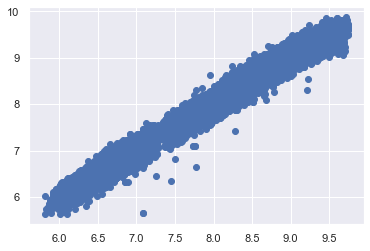

In [44]:
plt.scatter(y_train, y_hat)

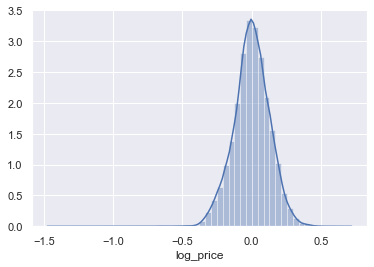

In [45]:
sns.distplot(y_hat - y_train)

In [46]:
reg.score(x_train,y_train)

0.9815398548868582

In [47]:
reg.intercept_

7.722774753773104

In [48]:
reg.coef_

array([ 1.02553992e+00, -6.59285547e-04, -3.07732262e-04,  2.29852218e-02,
        8.06519345e-02,  6.20933740e-02,  4.84254736e-02, -2.15818416e-02,
       -3.74829330e-02, -6.52032474e-02, -8.97526746e-02, -1.10458912e-01,
       -1.07726850e-01,  1.92638730e-01,  2.30594137e-01,  1.35516750e-01,
        2.74289281e-01,  2.90751951e-01,  2.44287847e-01,  2.59894921e-01])

In [49]:
summary = pd.DataFrame(data = x.columns.values, columns = ['features'])
summary['bias'] = reg.intercept_
summary['weights'] = reg.coef_
summary

features      bias   weights
0       log_carat  7.722775  1.025540
1       log_depth  7.722775 -0.000659
2       log_table  7.722775 -0.000308
3        cut_Good  7.722775  0.022985
4       cut_Ideal  7.722775  0.080652
5     cut_Premium  7.722775  0.062093
6   cut_Very Good  7.722775  0.048425
7         color_E  7.722775 -0.021582
8         color_F  7.722775 -0.037483
9         color_G  7.722775 -0.065203
10        color_H  7.722775 -0.089753
11        color_I  7.722775 -0.110459
12        color_J  7.722775 -0.107727
13     clarity_IF  7.722775  0.192639
14    clarity_SI1  7.722775  0.230594
15    clarity_SI2  7.722775  0.135517
16    clarity_VS1  7.722775  0.274289
17    clarity_VS2  7.722775  0.290752
18   clarity_VVS1  7.722775  0.244288
19   clarity_VVS2  7.722775  0.259895

In [50]:
y_hat_test = reg.predict(x_test)
y_hat_test

array([7.50842494, 8.58192986, 6.56431367, ..., 7.70871715, 7.57907858,
       9.23089066])

In [51]:
reg.score(x_test,y_test)

0.9811395120905371

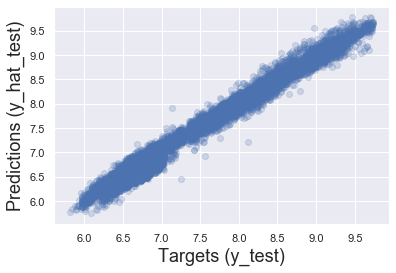

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0  1823.339405
1  5334.390221
2   709.324897
3  4887.743421
4  1346.260148

In [54]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction  Target
0       1823.339405     NaN
1       5334.390221     NaN
2        709.324897     NaN
3       4887.743421     NaN
4       1346.260148     NaN
...             ...     ...
10035   1867.207812     NaN
10036   2026.139797     NaN
10037   2227.682641     NaN
10038   1956.825081     NaN
10039  10207.628978     NaN

[10040 rows x 2 columns]

In [120]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.66
1   7.11
2   8.93
3   6.48
4   8.75
Name: log_price, dtype: float64

In [121]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction   Target
0        1905.31  2113.00
1        1374.67  1221.00
2        7958.27  7560.00
3         719.11   650.00
4        5899.05  6288.00
5       10360.98 10039.00
6         566.24   670.00
7         534.10   499.00
8         691.47   810.00
9        8883.94  8419.00
10       6118.77  6286.00
11        798.89   771.00
12       3895.74  4173.00
13       4381.65  4466.00
14        720.50   707.00
15       1940.51  1956.00
16        643.20   600.00
17       5390.20  5757.00
18       5535.52  5804.00
19       4083.88  3903.00
20        888.51   715.00
21       6393.39  7508.00
22       1768.15  1634.00
23        697.71   666.00
24        484.65   473.00
25        469.97   459.00
26       1504.69  1268.00
27       2593.10  2570.00
28       1934.75  1819.00
29      10134.57 14494.00
30       5899.09  5548.00
31       5338.19  5375.00
32       6836.43  7812.00
33        623.21   770.00
34       2207.48  1941.00
35       6145.42  5637.00
36        607.94   844.00
37        821.88   800.00
38        925.49   918.00
39       3943.61  4291.00
40        548.96   545.00
41       4663.51  5206.00
42      13144.78 14918.00
43        512.56   641.00
44       3350.43  3249.00
45       4694.23  3847.00
46        745.16   758.00
47       4170.34  4136.00
48       3023.18  2925.00
49        778.59   706.00
50       2126.23  2145.00
51      10595.81 10922.00
52       4785.22  4678.00
53       1736.21  1845.00
54       3082.34  2994.00
55       9581.38 10256.00
56       7533.19  7288.00
57      14483.68 11355.00
58       4421.11  4427.00
59        601.65   795.00
60       4751.23  4919.00
61       6195.25  7409.00
62        942.28   834.00
63       5851.92  6436.00
64       1398.63  1385.00
65       6359.07  7251.00
66       5561.24  5480.00
67        587.37   561.00
68       1728.98  1717.00
69       1259.59  1242.00
70        570.14   521.00
71        686.17   729.00
72       1132.82  1123.00
73       6244.94  6186.00
74       5571.69  6618.00
75       4470.54  4558.00
76        871.71   683.00
77      13435.36 16082.00
78       9298.68  9383.00
79        526.86   544.00
80        701.32   942.00
81       1956.89  1829.00
82       4175.52  4685.00
83       4067.54  4749.00
84       3151.86  3712.00
85      10934.27 10889.00
86       5690.23  6152.00
87       3215.46  3318.00
88       6594.35  7429.00
89       5682.70  6328.00
90       1954.38  1643.00
91        921.42   816.00
92      11885.44 12416.00
93       2307.11  2233.00
94        650.61   911.00
95        605.58   509.00
96       6934.01  6861.00
97        855.68   779.00
98        820.46   895.00
99       2587.44  2570.00
100      1032.48   790.00
101      2931.69  2757.00
102      2036.87  1912.00
103      1462.45  1425.00
104      3760.38  3374.00
105      5753.36  5886.00
106      2040.08  1694.00
107       723.46   797.00
108     12395.55 14465.00
109      4291.32  4566.00
110      3368.01  3696.00
111       685.15   878.00
112       753.92   758.00
113      1663.47  1554.00
114      3521.75  3431.00
115      1383.64  1295.00
116      2740.83  2690.00
117       624.61   595.00
118      1608.55  1600.00
119      3781.48  4742.00
120      3384.48  3557.00
121      4234.50  3357.00
122      8944.18  8232.00
123       610.62   589.00
124      6100.71  7244.00
125      1175.50  1153.00
126       552.67   552.00
127      3962.75  4516.00
128       912.89   705.00
129      5863.05  5001.00
130       487.08   576.00
131       811.01   767.00
132     12208.39 13298.00
133      5514.72  5233.00
134      5189.87  5666.00
135       684.62   942.00
136       836.68   826.00
137      7997.04  7560.00
138      3356.64  2902.00
139      2006.03  1993.00
140       873.22   839.00
141       551.51   507.00
142      4776.36  5030.00
143      6331.30  7467.00
144       641.64   756.00
145       997.11   959.00
146      1370.27  1243.00
147      3051.56  2816.00
148      3074.92  3616.00
149      2463.41  2402.00
150      1837.30  1674.00
151       989.52   992.00
152      3980.29  4397.00
15

In [122]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [123]:
df_pf

Prediction   Target  Residual
0        1905.31  2113.00    207.69
1        1374.67  1221.00   -153.67
2        7958.27  7560.00   -398.27
3         719.11   650.00    -69.11
4        5899.05  6288.00    388.95
5       10360.98 10039.00   -321.98
6         566.24   670.00    103.76
7         534.10   499.00    -35.10
8         691.47   810.00    118.53
9        8883.94  8419.00   -464.94
10       6118.77  6286.00    167.23
11        798.89   771.00    -27.89
12       3895.74  4173.00    277.26
13       4381.65  4466.00     84.35
14        720.50   707.00    -13.50
15       1940.51  1956.00     15.49
16        643.20   600.00    -43.20
17       5390.20  5757.00    366.80
18       5535.52  5804.00    268.48
19       4083.88  3903.00   -180.88
20        888.51   715.00   -173.51
21       6393.39  7508.00   1114.61
22       1768.15  1634.00   -134.15
23        697.71   666.00    -31.71
24        484.65   473.00    -11.65
25        469.97   459.00    -10.97
26       1504.69  1268.00   -236.69
27       2593.10  2570.00    -23.10
28       1934.75  1819.00   -115.75
29      10134.57 14494.00   4359.43
30       5899.09  5548.00   -351.09
31       5338.19  5375.00     36.81
32       6836.43  7812.00    975.57
33        623.21   770.00    146.79
34       2207.48  1941.00   -266.48
35       6145.42  5637.00   -508.42
36        607.94   844.00    236.06
37        821.88   800.00    -21.88
38        925.49   918.00     -7.49
39       3943.61  4291.00    347.39
40        548.96   545.00     -3.96
41       4663.51  5206.00    542.49
42      13144.78 14918.00   1773.22
43        512.56   641.00    128.44
44       3350.43  3249.00   -101.43
45       4694.23  3847.00   -847.23
46        745.16   758.00     12.84
47       4170.34  4136.00    -34.34
48       3023.18  2925.00    -98.18
49        778.59   706.00    -72.59
50       2126.23  2145.00     18.77
51      10595.81 10922.00    326.19
52       4785.22  4678.00   -107.22
53       1736.21  1845.00    108.79
54       3082.34  2994.00    -88.34
55       9581.38 10256.00    674.62
56       7533.19  7288.00   -245.19
57      14483.68 11355.00  -3128.68
58       4421.11  4427.00      5.89
59        601.65   795.00    193.35
60       4751.23  4919.00    167.77
61       6195.25  7409.00   1213.75
62        942.28   834.00   -108.28
63       5851.92  6436.00    584.08
64       1398.63  1385.00    -13.63
65       6359.07  7251.00    891.93
66       5561.24  5480.00    -81.24
67        587.37   561.00    -26.37
68       1728.98  1717.00    -11.98
69       1259.59  1242.00    -17.59
70        570.14   521.00    -49.14
71        686.17   729.00     42.83
72       1132.82  1123.00     -9.82
73       6244.94  6186.00    -58.94
74       5571.69  6618.00   1046.31
75       4470.54  4558.00     87.46
76        871.71   683.00   -188.71
77      13435.36 16082.00   2646.64
78       9298.68  9383.00     84.32
79        526.86   544.00     17.14
80        701.32   942.00    240.68
81       1956.89  1829.00   -127.89
82       4175.52  4685.00    509.48
83       4067.54  4749.00    681.46
84       3151.86  3712.00    560.14
85      10934.27 10889.00    -45.27
86       5690.23  6152.00    461.77
87       3215.46  3318.00    102.54
88       6594.35  7429.00    834.65
89       5682.70  6328.00    645.30
90       1954.38  1643.00   -311.38
91        921.42   816.00   -105.42
92      11885.44 12416.00    530.56
93       2307.11  2233.00    -74.11
94        650.61   911.00    260.39
95        605.58   509.00    -96.58
96       6934.01  6861.00    -73.01
97        855.68   779.00    -76.68
98        820.46   895.00     74.54
99       2587.44  2570.00    -17.44
100      1032.48   790.00   -242.48
101      2931.69  2757.00   -174.69
102      2036.87  1912.00   -124.87
103      1462.45  1425.00    -37.45
104      3760.38  3374.00   -386.38
105      5753.36  5886.00    132.64
106      2040.08  1694.00   -346.08
107       723.46   797.00     73.54
108     12395.55 14465.00   2069.45
109      4291.32  4566.00    274.68
110      3

In [124]:
df_pf['Difference'] = np.absolute(df_pf['Residual']/ df_pf['Target'] * 100)

In [125]:
df_pf.describe()

Prediction   Target  Residual  Difference
count     9125.00  9125.00   9125.00     9125.00
mean      3509.61  3548.50     38.89       10.16
std       3157.32  3273.81    611.86        8.25
min        314.21   334.00  -6164.41        0.00
25%        986.70   963.00   -158.01        3.72
50%       2437.50  2366.00     -7.58        8.20
75%       5059.14  5061.00    174.74       14.72
max      19062.41 17017.00   6226.23       61.04

In [126]:
pd.options.display.max_rows = 9125
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference'])

Prediction   Target  Residual  Difference
4072     4846.00  4846.00      0.00        0.00
8496      837.99   838.00      0.01        0.00
472      2407.09  2407.00     -0.09        0.00
3352     8830.49  8830.00     -0.49        0.01
260       473.03   473.00     -0.03        0.01
1961     4988.66  4989.00      0.34        0.01
3599     4193.69  4194.00      0.31        0.01
2975     1176.12  1176.00     -0.12        0.01
5484     6052.66  6052.00     -0.66        0.01
255      1953.23  1953.00     -0.23        0.01
8917     5954.19  5955.00      0.81        0.01
2170      911.14   911.00     -0.14        0.02
1060      872.86   873.00      0.14        0.02
425      2622.45  2622.00     -0.45        0.02
5446     1711.67  1712.00      0.33        0.02
6516     1753.34  1753.00     -0.34        0.02
7295     2469.51  2469.00     -0.51        0.02
6391     4231.04  4232.00      0.96        0.02
359      6752.16  6754.00      1.84        0.03
4173      684.19   684.00     -0.19        0.03
877       452.12   452.00     -0.12        0.03
6125     1120.68  1121.00      0.32        0.03
7907     4194.41  4193.00     -1.41        0.03
3968     1409.49  1410.00      0.51        0.04
3323     6698.54  6701.00      2.46        0.04
1895     2592.96  2592.00     -0.96        0.04
8610     1645.38  1646.00      0.62        0.04
7748     2294.90  2294.00     -0.90        0.04
6771      561.23   561.00     -0.23        0.04
8534     4910.01  4912.00      1.99        0.04
6290     9577.12  9581.00      3.88        0.04
3308     3667.48  3669.00      1.52        0.04
1350     6220.41  6223.00      2.59        0.04
8231      968.59   969.00      0.41        0.04
5752      984.42   984.00     -0.42        0.04
1434     1257.60  1257.00     -0.60        0.05
4850     9180.41  9185.00      4.59        0.05
6628     5581.18  5584.00      2.82        0.05
6643     3667.13  3669.00      1.87        0.05
362       984.51   984.00     -0.51        0.05
6621      833.45   833.00     -0.45        0.05
7967    11476.55 11470.00     -6.55        0.06
3663     1043.38  1044.00      0.62        0.06
4193     2207.40  2206.00     -1.40        0.06
185     15409.97 15420.00     10.03        0.07
6553     1289.13  1290.00      0.87        0.07
1568     2750.90  2749.00     -1.90        0.07
8818     3311.40  3309.00     -2.40        0.07
5778     1866.55  1868.00      1.45        0.08
6376     4317.59  4321.00      3.41        0.08
3760     4139.40  4136.00     -3.40        0.08
8838     2961.44  2964.00      2.56        0.09
5413     3884.37  3881.00     -3.37        0.09
3940     4057.59  4054.00     -3.59        0.09
2806     3669.71  3673.00      3.29        0.09
3755     4711.23  4707.00     -4.23        0.09
3614     2679.46  2677.00     -2.46        0.09
494      4165.98  4162.00     -3.98        0.10
3004     1567.50  1569.00      1.50        0.10
4550     5607.50  5602.00     -5.50        0.10
2878     1105.91  1107.00      1.09        0.10
1470     5656.29  5662.00      5.71        0.10
1039      624.36   625.00      0.64        0.10
8904     9964.30  9954.00    -10.30        0.10
866      5919.84  5926.00      6.16        0.10
4071     1413.50  1412.00     -1.50        0.11
7726      982.94   984.00      1.06        0.11
8689     3185.51  3189.00      3.49        0.11
6985     6173.23  6180.00      6.77        0.11
3704      882.97   882.00     -0.97        0.11
6343     5720.42  5714.00     -6.42        0.11
2433    11026.30 11039.00     12.70        0.12
1802     2659.08  2656.00     -3.08        0.12
2359    10031.65 10020.00    -11.65        0.12
8566     2160.52  2158.00     -2.52        0.12
5530     4917.86  4912.00     -5.86        0.12
5491     2407.11  2410.00      2.89        0.12
126       552.67   552.00     -0.67        0.12
5042     4040.94  4036.00     -4.94        0.12
437      3611.43  3607.00     -4.43        0.12
8867      621.22   622.00      0.78        0.13
6653     2213.22  2216.00      2.78        0.13
3851     2818.37  2822